In [3]:
import math

import numpy as np
from numpy.random import choice

import pandas as pd

from scipy.stats import uniform, expon
import matplotlib.pyplot as plt

%matplotlib inline

#### Uniform Distribution: a candidate for the Brand Points Distribution
For more info on Uniform Distribution, check the wikipedia. https://en.wikipedia.org/wiki/Continuous_uniform_distribution

In [5]:
# Parameters of Uniform Distribution
scale = 2
loc = 1

mean, var, skew, kurt = uniform.stats(loc=loc,scale=scale, moments='mvsk')
print('average value: {},\nvariance: {}'.format(mean, var))

average value: 2.0,
variance: 0.3333333333333333


We set Brand points are uniformly distributed over the interval [1,3].

Brand Points Distribution Graph


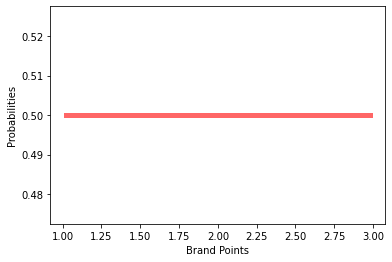

Average Brand Points: 2.0


In [6]:
# The graph of the pdf of the Gamma Distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(uniform.ppf(0.01, loc=loc, scale=scale),
                uniform.ppf(0.99, loc=loc, scale=scale), 100)
ax.plot(x, uniform.pdf(x, loc=loc, scale=scale),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
print('Brand Points Distribution Graph')
plt.xlabel('Brand Points')
plt.ylabel('Probabilities')
plt.show()
print('Average Brand Points: {}'.format(mean))

#### Exponential Distribution: a candidate for the price premium rate
For more info on Exponential Distribution, check the wikipedia.
https://en.wikipedia.org/wiki/Exponential_distribution

In [7]:
## Parameters of Exponential Distribution
lmbd = 5             # lambda
scale = 1/lmbd       # scale
loc = 0              # location

mean, var, skew, kurt = expon.stats(scale=scale, loc=loc, moments='mvsk')
print('average value: {:5.2f},\nvariance: {:5.2f}'.format(mean, var))

average value:  0.20,
variance:  0.04


Price Premium Rate Distribution Graph


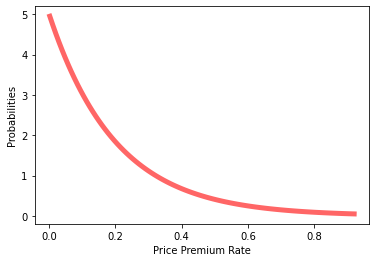

Average Premium Rate: 0.2


In [8]:
# The graph of the pdf of the Exponential Distribution
fig, ax = plt.subplots(1, 1)
x = np.linspace(expon.ppf(0.01, scale=scale, loc=loc),
                expon.ppf(0.99, scale=scale, loc=loc), 100)
ax.plot(x, expon.pdf(x, scale=scale, loc=loc),
       'r-', lw=5, alpha=0.6, label='expon pdf')
print('Price Premium Rate Distribution Graph')
plt.xlabel('Price Premium Rate')
plt.ylabel('Probabilities')
plt.show()
print('Average Premium Rate: {}'.format(mean))

## Mature Community
- The community has matured enough that the Brand points are given by a **Gamma** distribution.
- And the price premium rates are given by an **exponential** distribution, independent of the Brand points.

| Input | Distribution |
| :-: | :-: |
| Brand Points | **Gamma Distribution** |
| Price Premium Rates | **Exponential Distribution** |

The following are the experiments on a variety of ways that "Brand points" influence the likelihood.

#### Case Study: quadratic Brand Points
$$
\mathrm{Likelihood Value} = \mathrm{Brand Points}^2 \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [9]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

| Input | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Uniform Distribution | loc = 1; scale = 2 |

In [10]:
# Parameter for Brand Points Distribution, Uniform Distribution
scale_points = 2
loc_points = 1 

# Parameter for Price Premium Rate Distribution, Exponential Distribution
lambda_premium = 1
scale_premium = 1/lambda_premium
loc_premium = 1

In [11]:
# Generate the Points for 5000 ticket holders
Points = uniform.rvs(loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = 0.2*expon.rvs(loc=loc_premium, scale=scale_premium, size=no_tickets)

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = Points**2 * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [12]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,2.001664,2.999866,1.001266
premium_rate,0.403018,2.036192,0.200035
likelihood,0.000200,0.000780,0.000035


##### Selection of 100 tickets out of 5000

In [13]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

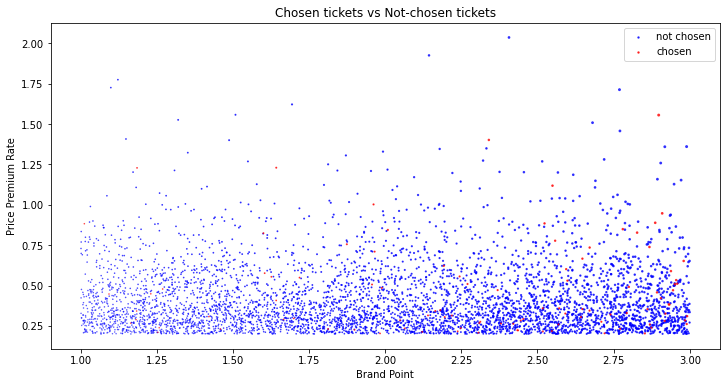

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [15]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                     premium_rate                    
                mean       max       min         mean       max       min
result                                                                   
chosen      2.306644  2.991500  1.012233     0.468777  1.555511  0.203304
not chosen  1.995440  2.999866  1.001266     0.401676  2.036192  0.200035

##### Point Distribution of 'chosen'

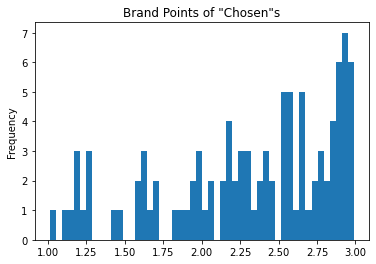

In [16]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

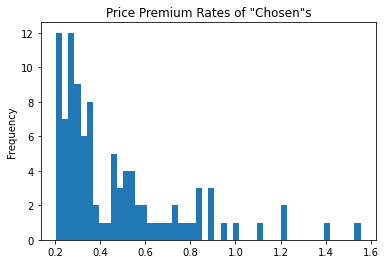

In [17]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [27]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(math.floor(df['point'].min()),1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(math.floor(df['point'].min()),1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(math.floor(df['point'].min()),1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

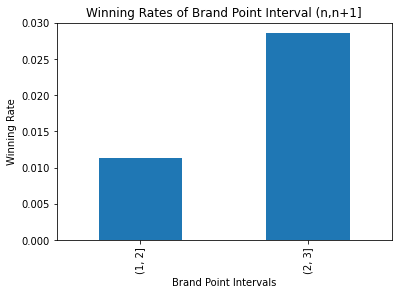

In [28]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [29]:
df_result_summary.head()

,total,not chosen,chosen,winning_rates
"(1, 2]",2482,2454,28,0.011281
"(2, 3]",2518,2446,72,0.028594


#### Practical Cases: cubic
$$
\mathrm{Likelihood Value} = \mathrm{Brand Points}^3 \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [21]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Exponential Distribution with pameter lambda 5.

|  | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Exponential Distribution | lambda = 5 |

In [30]:
# Parameter for Brand Points Distribution, Uniform Distribution
scale_points = 2
loc_points = 1 

# Parameter for Price Premium Rate Distribution, Exponential Distribution
lambda_premium = 1
scale_premium = 1/lambda_premium
loc_premium = 1

In [31]:
# Generate the Points for 5000 ticket holders
Points = uniform.rvs(loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = 0.2*expon.rvs(loc=loc_premium, scale=scale_premium, size=no_tickets)

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = Points**3 * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [32]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,1.987836,2.999777,1.000090
premium_rate,0.398607,1.817724,0.200049
likelihood,0.000200,0.001080,0.000015


##### Selection of 100 tickets out of 5000

In [33]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

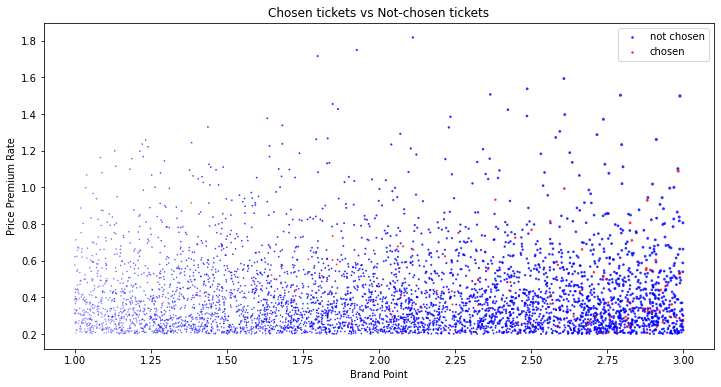

In [34]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [35]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                     premium_rate                    
                mean       max       min         mean       max       min
result                                                                   
chosen      2.395069  2.998578  1.056578     0.453293  1.088498  0.203116
not chosen  1.979525  2.999777  1.000090     0.397491  1.817724  0.200049

##### Point Distribution of 'chosen'

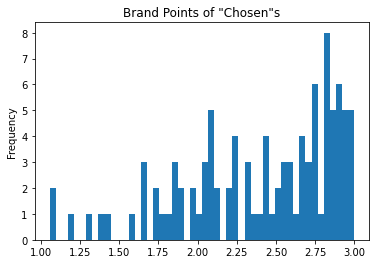

In [36]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

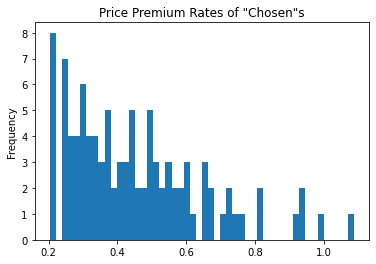

In [37]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [38]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(math.floor(df['point'].min()),1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(math.floor(df['point'].min()),1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(math.floor(df['point'].min()),1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

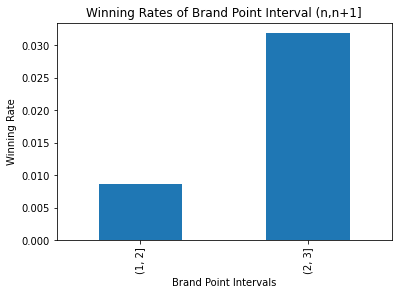

In [39]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [40]:
df_result_summary.head()

,total,not chosen,chosen,winning_rates
"(1, 2]",2554,2532,22,0.008614
"(2, 3]",2446,2368,78,0.031889


#### Practical Cases: exponential

$$
\mathrm{Likelihood Value} = \exp\big(Brand Points\big) \times \sqrt{\mathrm{Price Premium Rate}}
$$
There are 5000 tickets in the raffle and only 100 tickets will be selected with likelihoods determined by the above formula.

In [43]:
no_tickets = 5000
no_selections = 100

#### Generating the scenery

The Brand points of 5000 Ticket holders are generated randomly by Gamma Distribution with shape 1 and scale 2.

And the price premium rates are generated randomly, independent of Brand points, by Uniform Distribution over the interval [1,2].

|  | Distribution | Parameters |
| :-: | :-: | :-: |
| Brand Points | Gamma Distribution | shape = 1; scale = 2  |
| Price Premium Rates | Uniform Distribution | location = 1; scale = 2 |

In [44]:
# Parameter for Brand Points Distribution, Uniform Distribution
scale_points = 2
loc_points = 1 

# Parameter for Price Premium Rate Distribution, Exponential Distribution
lambda_premium = 1
scale_premium = 1/lambda_premium
loc_premium = 1

In [46]:
# Generate the Points for 5000 ticket holders
Points = uniform.rvs(loc=loc_points,scale=scale_points,size=no_tickets)

# Generating the price premium rate for 5000 ticket holders. independently of "points".
Price_Premium_Rates = 0.2*expon.rvs(loc=loc_premium, scale=scale_premium, size=no_tickets)

# Likelihood_Values = Points * Price_Premium_Rates
Likelihood_Values = np.exp(Points) * np.sqrt(Price_Premium_Rates) # First calculate each tickets own value
Likelihood_Values = Likelihood_Values / Likelihood_Values.sum() # Second calibrate likelihood values to have the sum of all to be 1.

# Put all the values into a data frame with 'color' column being 'b'.
df = pd.DataFrame(data={'point':Points,'premium_rate':Price_Premium_Rates,'likelihood':Likelihood_Values,'result':'not chosen'})

In [47]:
df_summary = pd.DataFrame()
df_summary.loc[:,'mean'] = df[['point','premium_rate','likelihood']].mean()
df_summary.loc[:,'max'] = df[['point','premium_rate','likelihood']].max()
df_summary.loc[:,'min'] = df[['point','premium_rate','likelihood']].min()
df_summary

,mean,max,min
point,2.009476,2.999910,1.000428
premium_rate,0.400802,2.689638,0.200066
likelihood,0.000200,0.001026,0.000046


##### Selection of 100 tickets out of 5000

In [48]:
# Choose 100 tickets out of 1000 with the likelihood given by Likelihood_Values
draw = np.random.choice([n for n in range(no_tickets)], no_selections, replace=False, p=Likelihood_Values)

# Change the colors of the chosen tickets to red 'r'
for idx in draw:
    df.loc[idx,'result'] = 'chosen'

#### Scatter Plots of brand points and price premium rate

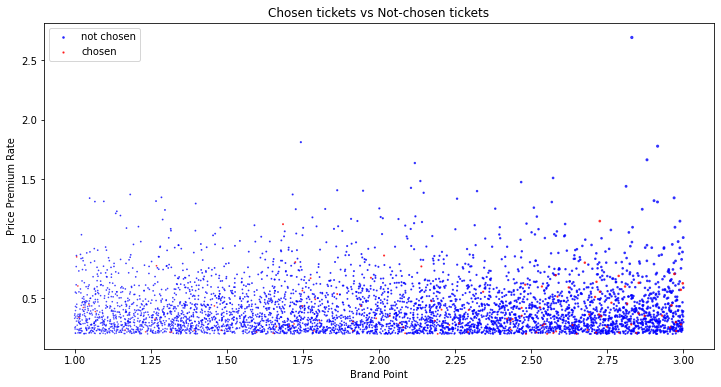

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
for result in ['not chosen','chosen']:
    color = 'b' if result=='not chosen' else 'r'
    scatter = ax.scatter(df[df['result']==result]['point'], df[df['result']==result]['premium_rate'], c=color, s=5000*df[df['result']==result]['likelihood'], label=result, alpha=0.7,cmap='viridis')
ax.set_title('Chosen tickets vs Not-chosen tickets')
ax.set_xlabel('Brand Point')
ax.set_ylabel('Price Premium Rate')
ax.legend()
plt.show()

#### Points, Premium Rate and Likelihood for chosens and not-chosens

In [50]:
df.groupby('result').agg({'point':['mean','max','min'],'premium_rate':['mean','max','min']})

point                     premium_rate                    
                mean       max       min         mean       max       min
result                                                                   
chosen      2.225632  2.997969  1.007072     0.410828  1.147725  0.200979
not chosen  2.005064  2.999910  1.000428     0.400598  2.689638  0.200066

##### Point Distribution of 'chosen'

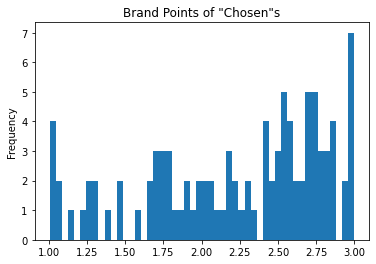

In [51]:
df[df['result']=='chosen']['point'].plot.hist(bins=50)
plt.title('Brand Points of "Chosen"s')
plt.show()

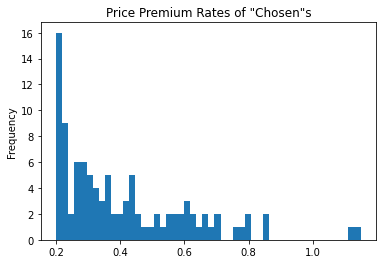

In [52]:
df[df['result']=='chosen']['premium_rate'].plot.hist(bins=50)
plt.title('Price Premium Rates of "Chosen"s')
plt.show()

#### Results Analysis

In [53]:
df_result_summary = pd.concat([pd.cut(df['point'],bins=[n for n in range(math.floor(df['point'].min()),1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='not chosen']['point'],bins=[n for n in range(math.floor(df['point'].min()),1+math.ceil(df['point'].max()))]).value_counts(),
                        pd.cut(df[df['result']=='chosen']['point'],bins=[n for n in range(math.floor(df['point'].min()),1+math.ceil(df['point'].max()))]).value_counts()],
                       axis=1)
df_result_summary.columns = ['total','not chosen','chosen']
df_result_summary['winning_rates'] = df_result_summary['chosen'] / df_result_summary['total']
df_result_summary['winning_rates'] = df_result_summary['winning_rates'].fillna(0)

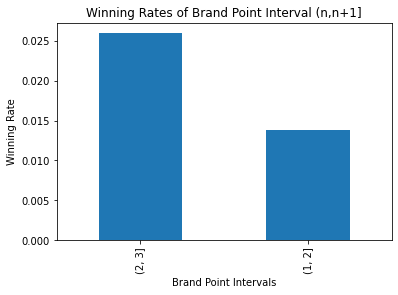

In [54]:
df_result_summary['winning_rates'].plot.bar()
plt.xlabel('Brand Point Intervals')
plt.ylabel('Winning Rate')
plt.title('Winning Rates of Brand Point Interval (n,n+1]')
plt.show()

In [55]:
df_result_summary.head()

,total,not chosen,chosen,winning_rates
"(2, 3]",2539,2473,66,0.025994
"(1, 2]",2461,2427,34,0.013816
